# MNIST Neural Network



## Loading Data

Load MNIST dataset, and split the training images into 80% images to use for training and 20% images to use for validation.  
(N.B. The images are greyscale values ranging from 0.0 to 255.0, so will later need rescaling from 0.0 to 1.0)

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [35]:
def preprocess(image, label):
    # Cast to float32, normalise, and reshape to (28, 28, 1)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    return image, label

batch_size = 10

# Load datasets
train_digits = tfds.load('mnist', split='train[:80%]', shuffle_files=True, as_supervised=True)
val_digits   = tfds.load('mnist', split='train[80%:]', as_supervised=True)
test_digits  = tfds.load('mnist', split='test', as_supervised=True)

# Apply preprocessing and batching
train_digits = train_digits.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_digits   = val_digits.map(preprocess).batch(batch_size)
test_digits  = test_digits.map(preprocess).batch(batch_size)

## Create CNN

Create Convolutional Neural Network model to train on MNIST data.

In [44]:
input_shape = (28, 28, 1)
input = tf.keras.Input(shape=(28, 28, 1))
regularizer = tf.keras.regularizers.L2(0.005)

# Conv2d layer, with 32 5x5 filter and stride 1
Z1 = tf.keras.layers.Conv2D(32, (5, 5), strides=1, activity_regularizer=regularizer)(input)
# ReLU
A1 = tf.keras.layers.ReLU()(Z1)
# Conv2d layer, with 32 5x5 filters and stride 1
Z2 = tf.keras.layers.Conv2D(32, (5, 5), strides=1, activity_regularizer=regularizer)(A1)
# ReLU
A2 = tf.keras.layers.ReLU()(Z2)
# Max Pooling window 2x2, stride 2
P1 = tf.keras.layers.MaxPool2D((2,2), (2,2))(A2)
# Cov2d layer, with 40 5x5 filters and stride 2
Z3 = tf.keras.layers.Conv2D(64, (5, 5), padding='same', strides=1, activity_regularizer=regularizer)(P1)
# ReLU
A3 = tf.keras.layers.ReLU()(Z3)
# Conv2d 'network' layer, to halve num of channels
Z4 = tf.keras.layers.Conv2D(32, (1, 1), strides=1, activity_regularizer=regularizer)(A3)
# ReLU
A4 = tf.keras.layers.ReLU()(Z4)
# Max pooling window 2x2, stride 2
P2 = tf.keras.layers.MaxPool2D((2, 2), (2, 2))(A4)
# Flatten
F = tf.keras.layers.Flatten()(P2)
FD = tf.keras.layers.Dropout(0.4)(F)
# dense layer, 80 nodes
D1 = tf.keras.layers.Dense(80, activation='relu', activity_regularizer=regularizer)(FD)
D1D = tf.keras.layers.Dropout(0.4)(D1)
# output layer
output = tf.keras.layers.Dense(10, activation='softmax')(D1D)

model = tf.keras.Model(inputs=input, outputs=output)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_29 (ReLU)                 │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 20, 20, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_30 (ReLU)                 │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 10, 10, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_31 (ReLU)                 │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 10, 10, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_32 (ReLU)                 │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 80)             │        64,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,698 (565.23 KB)

 Trainable params: 144,698 (565.23 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

Train the model on the training data, and use validation data to track accuracy and progress

In [ ]:
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.9

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_digits, epochs=20, validation_data=val_digits, callbacks=[callback])

Epoch 1/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 219s 44ms/step - accuracy: 0.8802 - loss: 0.8622 - val_accuracy: 0.9718 - val_loss: 0.3831 - learning_rate: 0.0010
Epoch 2/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 158s 23ms/step - accuracy: 0.9532 - loss: 0.4720 - val_accuracy: 0.9737 - val_loss: 0.3713 - learning_rate: 0.0010
Epoch 3/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 106s 22ms/step - accuracy: 0.9583 - loss: 0.4253 - val_accuracy: 0.9770 - val_loss: 0.2954 - learning_rate: 0.0010
Epoch 4/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 107s 22ms/step - accuracy: 0.9599 - loss: 0.4097 - val_accuracy: 0.9793 - val_loss: 0.2795 - learning_rate: 0.0010
Epoch 5/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 116s 24ms/step - accuracy: 0.9620 - loss: 0.4000 - val_accuracy: 0.9758 - val_loss: 0.3118 - learning_rate: 0.0010
Epoch 6/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 123s 26ms/step - accuracy: 0.9625 - loss: 0.3744 - val_accuracy: 0.9816 - val_loss: 0.2142 - learning_rate: 9.0000e-04
Epoch 7/20
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 123s 26ms/st

### View Training History

C:\Users\User\AppData\Local\Temp\ipykernel_14484\1989446866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss': 'Training', 'val_loss': 'Validation'}, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14484\1989446866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy': 'Training', 'val_accuracy': 'Validation'}, inplace=True)


<Axes: title={'center': 'Model Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

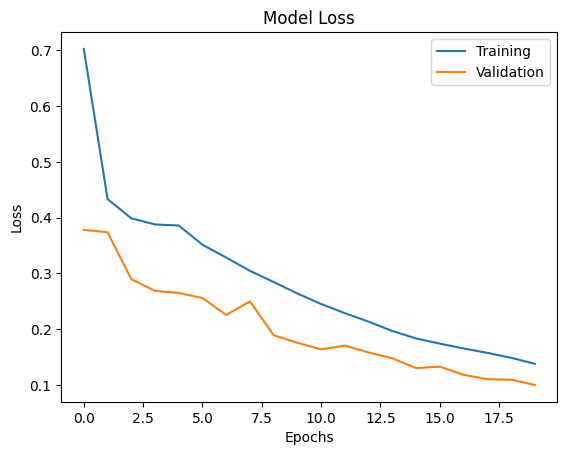

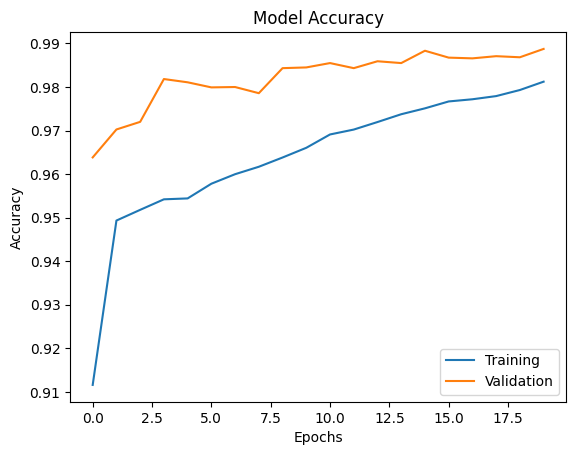

In [39]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss', 'val_loss']]
df_loss.rename(columns={'loss': 'Training', 'val_loss': 'Validation'}, inplace=True)

df_acc = df_loss_acc[['accuracy', 'val_accuracy']]
df_acc.rename(columns={'accuracy': 'Training', 'val_accuracy': 'Validation'}, inplace=True)

df_loss.plot(title='Model Loss', ylabel='Loss', xlabel='Epochs')
df_acc.plot(title='Model Accuracy', ylabel='Accuracy', xlabel='Epochs')

# Test Model

Test the model on test data.

In [ ]:
model.evaluate(test_digits)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9885 - loss: 0.0962


[0.09620567411184311, 0.9884999990463257]

### (Optional) Save Model

Save model weights, biases and structure so it can later be loaded and recreated.

In [41]:

model.save('mnist_conv_regularized_dropout_98.85.keras')